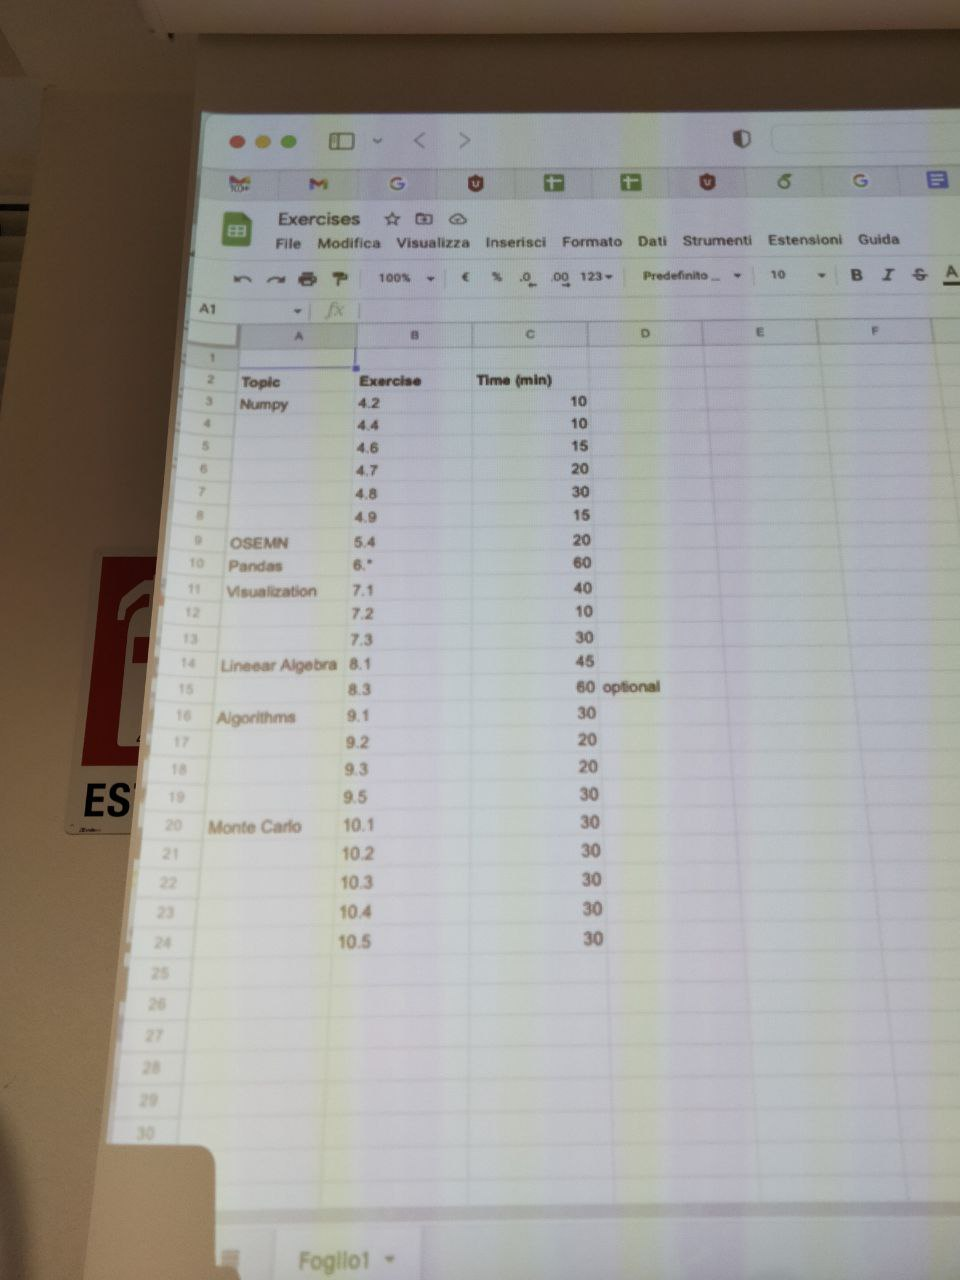

In [1]:
from IPython.display import Image
Image('ex_list_zanetti.jpg',width=500,height=500)

**Topic 4 - Numpy**:

4.2) - 10 minutes

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [3]:
# 1) Using numpy.outer():
one = np.outer(u,v)
print(one)

# 2) Using a nested for loop:
two = np.zeros((4,4),int)
for i in range(np.shape(u)[0]):
    for j in range(np.shape(v)[0]):
        two[i,j] = u[i]*v[j]
print(two) 

# 3) Using list comprehension:
three = np.array([[i*j for i in v] for j in u]).reshape(4,4)
print(three)

# 4) Using Numpy broadcasting operations:
z = np.tile(u,(4,1)).T
four = (v*z)
print(four)

# Test:
print(one == two)
print(one == three)
print(one == four)




[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


4.4) - 10 Minutes

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

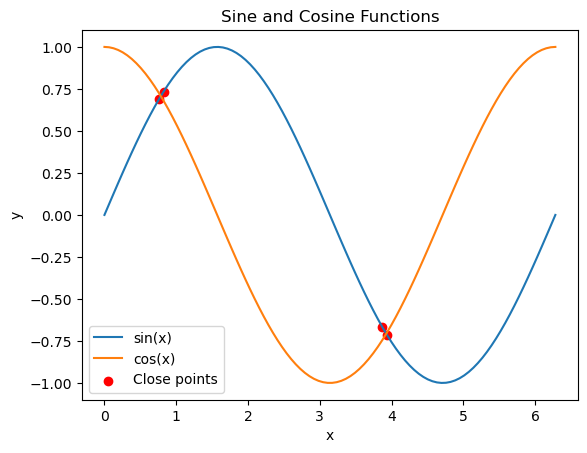

In [4]:
import matplotlib.pyplot as plt

lin = np.linspace(0,2*np.pi,100)

tenth = lin[::10]

reverse = lin[::-1]

diff = lin[np.abs(np.sin(lin)-np.cos(lin)) < 0.1]

# Make a plot showing the sin and cos functions
plt.plot(lin, np.sin(lin), label='sin(x)')
plt.plot(lin, np.cos(lin), label='cos(x)')

# Indicate where sine and cosine are close
plt.scatter(diff, np.sin(diff), color='red', label='Close points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()

# Show the plot
plt.show()


4.6) - 15 minutes

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [5]:
# City names
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]

# Corresponding positions in miles
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

# Construct a 2D grid of distances using broadcasting
distances_miles = np.abs(positions_miles[:, np.newaxis] - positions_miles)

# Convert distances to kilometers (1 mile = 1.60934 kilometers)
distances_km = distances_miles * 1.60934

# Display the 2D grid of distances in miles
print("Distances (in miles):")
print(distances_miles)

# Display the 2D grid of distances in kilometers
print("\nDistances (in kilometers):")
print(distances_km)


Distances (in miles):
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distances (in kilometers):
[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.

4.7) - 20 minutes

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [6]:
def primeNumbers(N):
    numbers = np.arange(N)
    
    boolArr = np.array([True]*N)


    for i in range(N):
        if i==0 or i==1 or i==2:
            continue 
        for j in range(i):
            if j==0 or j==1:
                continue
            if i%j==0:
                boolArr[i]=False
                break
            
    return (numbers[boolArr])#masking process
primeNumbers(100)   
    

array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97])

In [7]:
# Check performances:

%timeit primeNumbers(100)
%timeit primeNumbers(1000)
%timeit primeNumbers(10000)
    

58.6 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.86 ms ± 84.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
217 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
# With sieve of Eratosthenes:

def erat(N):
    is_prime = [True]*(N+1)
    is_prime[0] = is_prime[1] = False
    
    for num in range(2,int(N**0.5)+1):
        if is_prime[num]:
            for multiple in range(num*2,N + 1,num):
                is_prime[multiple] = False
        
    primes = [num for num in range(N+1) if is_prime[num]]    
    return primes
print(erat(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [22]:
%timeit erat(10)
%timeit erat(100)
%timeit erat(1000)

964 ns ± 13.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.22 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
47.6 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


4.8) - 20 minutes

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [25]:
import numpy.random as npr
import matplotlib.pyplot as plt

(1000, 200)
[[ 1  1 -1 ... -1 -1  1]
 [ 1 -1  1 ... -1 -1  1]
 [ 1 -1 -1 ...  1  1  1]
 ...
 [-1 -1 -1 ...  1 -1  1]
 [-1 -1 -1 ...  1 -1  1]
 [-1 -1 -1 ...  1  1  1]] 

(1000, 200)
[[  1   2   1 ...   4   3   4]
 [  1   0   1 ... -28 -29 -28]
 [  1   0  -1 ...   6   7   8]
 ...
 [ -1  -2  -3 ...   8   7   8]
 [ -1  -2  -3 ...   4   3   4]
 [ -1  -2  -3 ...  -4  -3  -2]] 

[[  1   4   1 ...  16   9  16]
 [  1   0   1 ... 784 841 784]
 [  1   0   1 ...  36  49  64]
 ...
 [  1   4   9 ...  64  49  64]
 [  1   4   9 ...  16   9  16]
 [  1   4   9 ...  16   9   4]] 

(200,)
[  1.      1.996   2.976   3.928   4.72    5.988   6.744   7.744   8.592
   9.228  10.384  11.252  11.976  13.012  14.4    15.512  16.2    17.516
  18.32   19.196  19.76   21.036  21.872  22.948  23.576  24.04   24.904
  25.692  27.096  27.744  28.968  30.24   31.376  31.728  32.52   33.632
  34.64   35.648  36.648  38.324  39.088  39.992  41.16   43.432  44.296
  45.496  47.016  47.912  49.344  49.944  51.16   52.624  

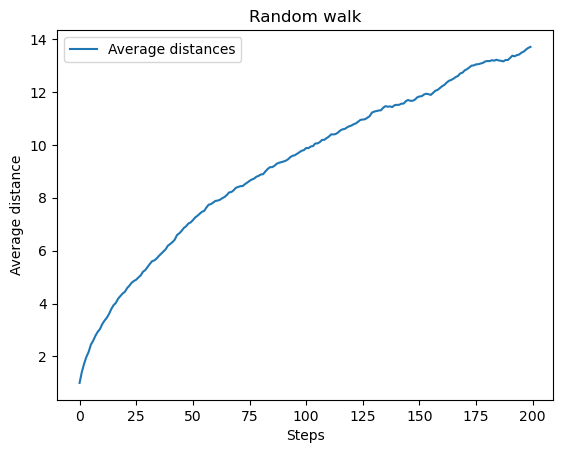

In [63]:
walkers = npr.choice(a=[-1,+1],size=(1000,200)) ## steps 1 and 2
print(np.shape(walkers))
print(walkers,'\n')
dist = np.cumsum(walkers,axis=1) ## step 3
print(np.shape(dist))
print(dist,'\n')
dist2 = np.square(dist)
print(dist2,'\n')
mean = np.mean(dist2,axis=0)
print(np.shape(mean))
print(mean,'\n')
sqr = np.sqrt(mean)

## Plot: 
plt.plot(range(0,200),sqr,label='Average distances')

plt.xlabel('Steps')
plt.ylabel('Average distance')
plt.title('Random walk')

plt.legend()


4.9) 

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.